# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Aaron Hernandez Jimenez

- ID: A01642529

- My carreer: ITC (Ingenieria en Tecnologias Computacionales)


# Importing libraries

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# Set the aesthetic style of the plots because I like it its more readable
sns.set(style="whitegrid")


# PART 1

## Do clustering using your assigned dataset

## a) Load data

In [2]:
data = pd.read_csv('A01642529_X.csv')

data.head()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,0,-4.389273,1.929723,-2.690788,2.692886,8.502780,10.371972,8.844740,-7.857037,6.811043
1,1,-3.310582,-0.066877,-4.152660,1.462794,11.487427,7.499343,7.276957,-6.711631,7.750469
2,2,-4.761482,-2.170399,5.825530,-2.224655,4.583345,-12.020905,-6.368817,-9.830435,-2.779110
3,3,6.107083,-6.426428,8.162717,-1.846597,3.598258,4.127946,5.160569,7.091607,-4.258262
4,4,-4.634640,-6.074783,7.119769,-9.469154,6.566896,-11.101066,-11.047983,-8.969069,-2.237388


## b) Data managment


Print the first 7 rows

In [3]:
data.head(7)

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,0,-4.389273,1.929723,-2.690788,2.692886,8.502780,10.371972,8.844740,-7.857037,6.811043
1,1,-3.310582,-0.066877,-4.152660,1.462794,11.487427,7.499343,7.276957,-6.711631,7.750469
2,2,-4.761482,-2.170399,5.825530,-2.224655,4.583345,-12.020905,-6.368817,-9.830435,-2.779110
3,3,6.107083,-6.426428,8.162717,-1.846597,3.598258,4.127946,5.160569,7.091607,-4.258262
4,4,-4.634640,-6.074783,7.119769,-9.469154,6.566896,-11.101066,-11.047983,-8.969069,-2.237388
5,5,3.559703,-7.728676,10.169357,-0.763545,5.023876,4.905923,0.917093,9.125278,-6.662292
6,6,-3.183120,0.804178,-0.723100,-0.039540,8.115398,11.738289,6.834224,-8.469226,5.737707


Print the last 4 rows

In [4]:
data.tail(4)

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9
455,455,4.824199,-9.768056,9.296975,3.162091,4.567685,4.413976,2.216211,6.902664,-7.205914
456,456,2.892656,-4.418090,2.881223,0.432169,-3.456086,-5.256417,8.253383,-4.825976,-6.499148
457,457,-5.421235,-7.003045,9.900401,-0.971319,5.271103,-8.102093,-8.043231,-4.889455,-6.444398
458,458,2.726105,-5.949173,4.600312,4.089640,3.400536,5.596824,3.545720,5.422275,-8.101502


How many rows and columns are in your data?

Use the `shape` method


In [6]:
num_rows = data.shape[0]
print(f'The number of rows in the data is: {num_rows}')

The number of rows in the data is: 459


Print the name of all columns

Use the `columns` method

In [7]:
print(data.columns)

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9'], dtype='object')


What is the data type in each column

Use the `dtypes` method

In [8]:
print(data.dtypes)

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
x6            float64
x7            float64
x8            float64
x9            float64
dtype: object


What is the meaning of rows and columns?

Your responses here

1. Rows: These are horizontal collections of data items. Each row typically represents a single record or entry in the dataset. For example, in a table of student information, each row might represent one student.


2. Columns: These are vertical collections of data items. Each column typically represents a specific attribute or field of the dataset. For example, in the same table of student information, one column might represent student names, another column might represent ages, and so on.

3. In programming, especially when dealing with data frames (like in pandas for Python), you often manipulate rows and columns to filter, sort, and analyze data.


Print a statistical summary of your columns


In [9]:
data.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9
count,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000
mean,229.000000,-0.568356,-3.161031,4.587246,-0.425902,2.692057,-0.676814,3.154291,-3.001131,-1.357289
std,132.646146,4.793587,4.031887,4.349719,2.892078,5.503550,7.764367,6.725294,7.494005,5.547406
min,0.000000,-11.902105,-13.464699,-5.471709,-9.469154,-10.818589,-15.017018,-11.282517,-13.688152,-10.518086
25%,114.500000,-4.271075,-6.041915,1.448994,-2.191301,-1.290781,-7.802325,-1.943246,-8.189391,-5.887638
50%,229.000000,-0.034788,-3.271569,5.375324,-0.253336,4.009343,-1.223130,4.750225,-6.353459,-2.576003
75%,343.500000,3.399889,-0.408173,7.953086,1.632804,6.583964,6.110195,8.781579,1.478320,2.942365
max,458.000000,9.333548,6.670891,14.227678,5.765349,12.001651,14.144045,14.649797,13.397962,11.855785


1. What is the minumum and maximum values of each variable: 


Unnamed: 0: min = 0.000000, max = 458.000000

x1: min = -11.902105, max = 9.333548

x2: min = -13.464699, max = 6.670891

x3: min = -5.471709, max = 14.227678

x4: min = -9.469154, max = 5.765349

x5: min = -10.818589, max = 12.001651

x6: min = -15.017018, max = 14.144045

x7: min = -11.282517, max = 14.649797

x8: min = -13.688152, max = 13.397962

x9: min = -10.518086, max = 11.855785


2. What is the mean and standar deviation of each variable:


Unnamed: 0: mean = 229.000000, std = 132.646146

x1: mean = -0.568356, std = 4.793587

x2: mean = -3.161031, std = 4.031887

x3: mean = 4.587246, std = 4.349719

x4: mean = -0.425902, std = 2.892078

x5: mean = 2.692057, std = 5.503550

x6: mean = -0.676814, std = 7.764367

x7: mean = 3.154291, std = 6.725294

x8: mean = -3.001131, std = 7.494005

x9: mean = -1.357289, std = 5.547406


3. What the 25%, 50% and 75% represent?:


These values represent the quartiles of the dataset:

25% (First Quartile or Q1): 25% of the data points are less than this value.

50% (Second Quartile or Median): 50% of the data points are less than this value, splitting the data in half.

75% (Third Quartile or Q3): 75% of the data points are less than this value.



Rename the columns using the same name with capital letters

In [10]:
data.columns = [col.upper() for col in data.columns]
print(data.columns)

Index(['UNNAMED: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'], dtype='object')


Rename the columns to their original names

In [11]:
data.columns = ['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']
print(data.columns)

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9'], dtype='object')


Use two different alternatives to get one of the columns

In [13]:
column_x1_bracket = data['x1']
print(column_x1_bracket.head())

column_x1_dot = data.x1
print(column_x1_dot.head())

0   -4.389273
1   -3.310582
2   -4.761482
3    6.107083
4   -4.634640
Name: x1, dtype: float64
0   -4.389273
1   -3.310582
2   -4.761482
3    6.107083
4   -4.634640
Name: x1, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [14]:
data_slice = data.iloc[62:73, 1:3]
print(data_slice)

          x1        x2
62 -3.274649 -0.185221
63 -5.852806 -4.692345
64 -4.847952 -5.154898
65 -7.192114 -4.328130
66  3.108868 -8.572129
67  5.769521 -2.220691
68 -4.152998  0.861736
69  5.194499 -8.384993
70 -2.874590  1.670994
71  4.792138 -4.071502
72 -2.803298  1.655563


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [15]:
null_values_x1 = data['x1'].isnull().sum()
null_values_x2 = data['x2'].isnull().sum()

not_null_values_x1 = data['x1'].notnull().sum()
not_null_values_x2 = data['x2'].notnull().sum()

total_rows = data.shape[0]
assert null_values_x1 + not_null_values_x1 == total_rows, "Sum of null and not null values for x1 does not equal total number of rows"
assert null_values_x2 + not_null_values_x2 == total_rows, "Sum of null and not null values for x2 does not equal total number of rows"

print(f'Null values in x1: {null_values_x1}, Not null values in x1: {not_null_values_x1}')
print(f'Null values in x2: {null_values_x2}, Not null values in x2: {not_null_values_x2}')
print(f'Total rows: {total_rows}')

Null values in x1: 0, Not null values in x1: 459
Null values in x2: 0, Not null values in x2: 459
Total rows: 459


Discard the last column


In [16]:
data = data.drop(columns=data.columns[-1])
print(data.head())

   Unnamed: 0        x1        x2        x3        x4         x5         x6  \
0           0 -4.389273  1.929723 -2.690788  2.692886   8.502780  10.371972   
1           1 -3.310582 -0.066877 -4.152660  1.462794  11.487427   7.499343   
2           2 -4.761482 -2.170399  5.825530 -2.224655   4.583345 -12.020905   
3           3  6.107083 -6.426428  8.162717 -1.846597   3.598258   4.127946   
4           4 -4.634640 -6.074783  7.119769 -9.469154   6.566896 -11.101066   

          x7        x8  
0   8.844740 -7.857037  
1   7.276957 -6.711631  
2  -6.368817 -9.830435  
3   5.160569  7.091607  
4 -11.047983 -8.969069  


### Questions

Based on the previos results, provide a full description of yout dataset

Your response:

The dataset consists of 459 rows and 9 columns. Each row represents a unique observation, and each column represents a different variable. The columns are named 'Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', and 'x8'. 

- The 'Unnamed: 0' column is an integer index ranging from 0 to 458.
- The other columns ('x1' to 'x8') are floating-point numbers.

There are no missing values in the dataset, as indicated by the count of non-null values for each column. The dataset has been verified to have consistent row counts across all columns.

The statistical summary of the dataset shows a range of values for each variable, with varying means and standard deviations. The minimum and maximum values for each variable indicate the spread and range of the data. The quartiles (25%, 50%, and 75%) provide insights into the distribution of the data.

Overall, the dataset appears to be clean and well-structured, with no missing values and a consistent format across all columns.



## c) Data visualization

Plot in the histogram of one of the variables

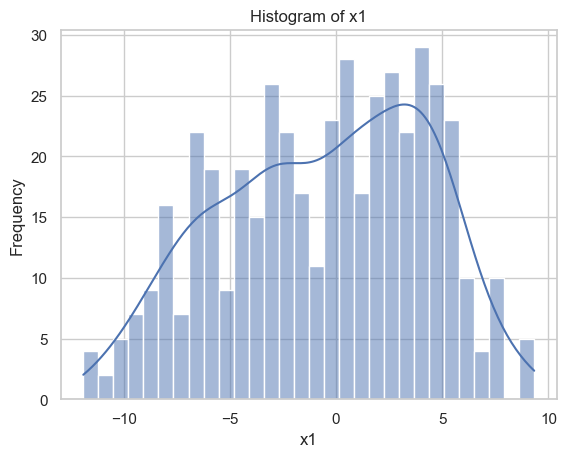

In [17]:
sns.histplot(data['x1'], bins=30, kde=True)
plt.xlabel('x1')
plt.ylabel('Frequency')
plt.title('Histogram of x1')
plt.show()

Plot in the same figure the histogram of two variables



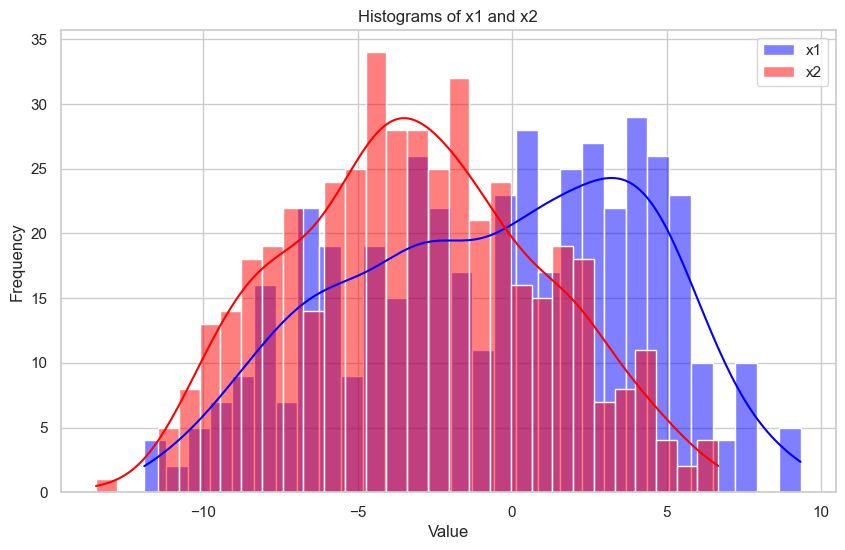

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data['x1'], bins=30, kde=True, color='blue', label='x1', alpha=0.5)
sns.histplot(data['x2'], bins=30, kde=True, color='red', label='x2', alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of x1 and x2')
plt.legend()
plt.show()

Based on these plots, provide a description of your data:

Your response here:
The curve is similar, only that x2 is more on the left with the peak around -2, while x1 is more on the right with the peak around +4.5.
also

Plot the boxplot of one of the variables

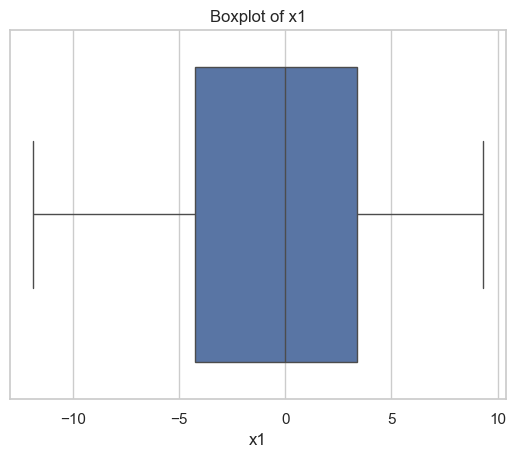

In [19]:
sns.boxplot(x=data['x1'])
plt.xlabel('x1')
plt.title('Boxplot of x1')
plt.show()

Plot in the same figure the boxplot of two variables

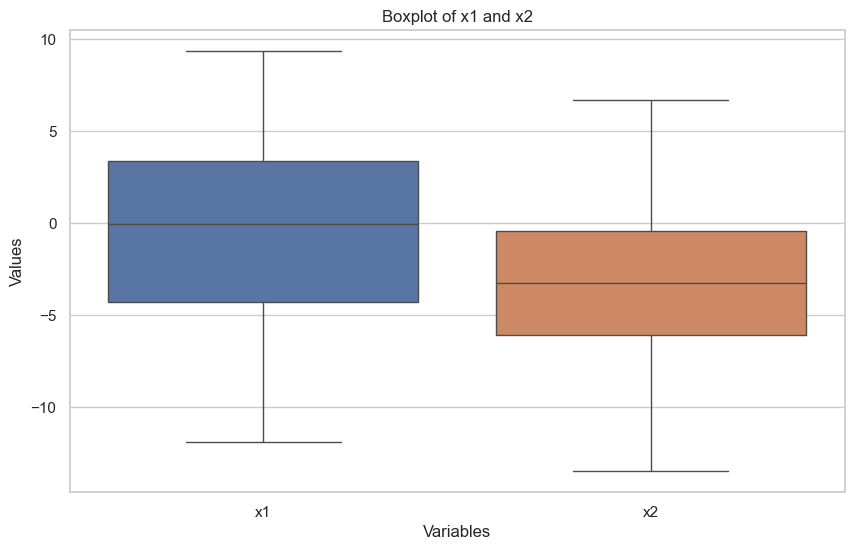

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['x1', 'x2']])
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Boxplot of x1 and x2')
plt.show()

Based on these plots, provide a description of your data:

Your response here: x1 has a more evenly spread distribution with a tendency towards positive values.
x2 appears more concentrated around negative values, with a smaller IQR but a similar overall range as x1. Both variables exhibit symmetric spread without obvious outliers.

Plot the scatter plot between all pair of variables

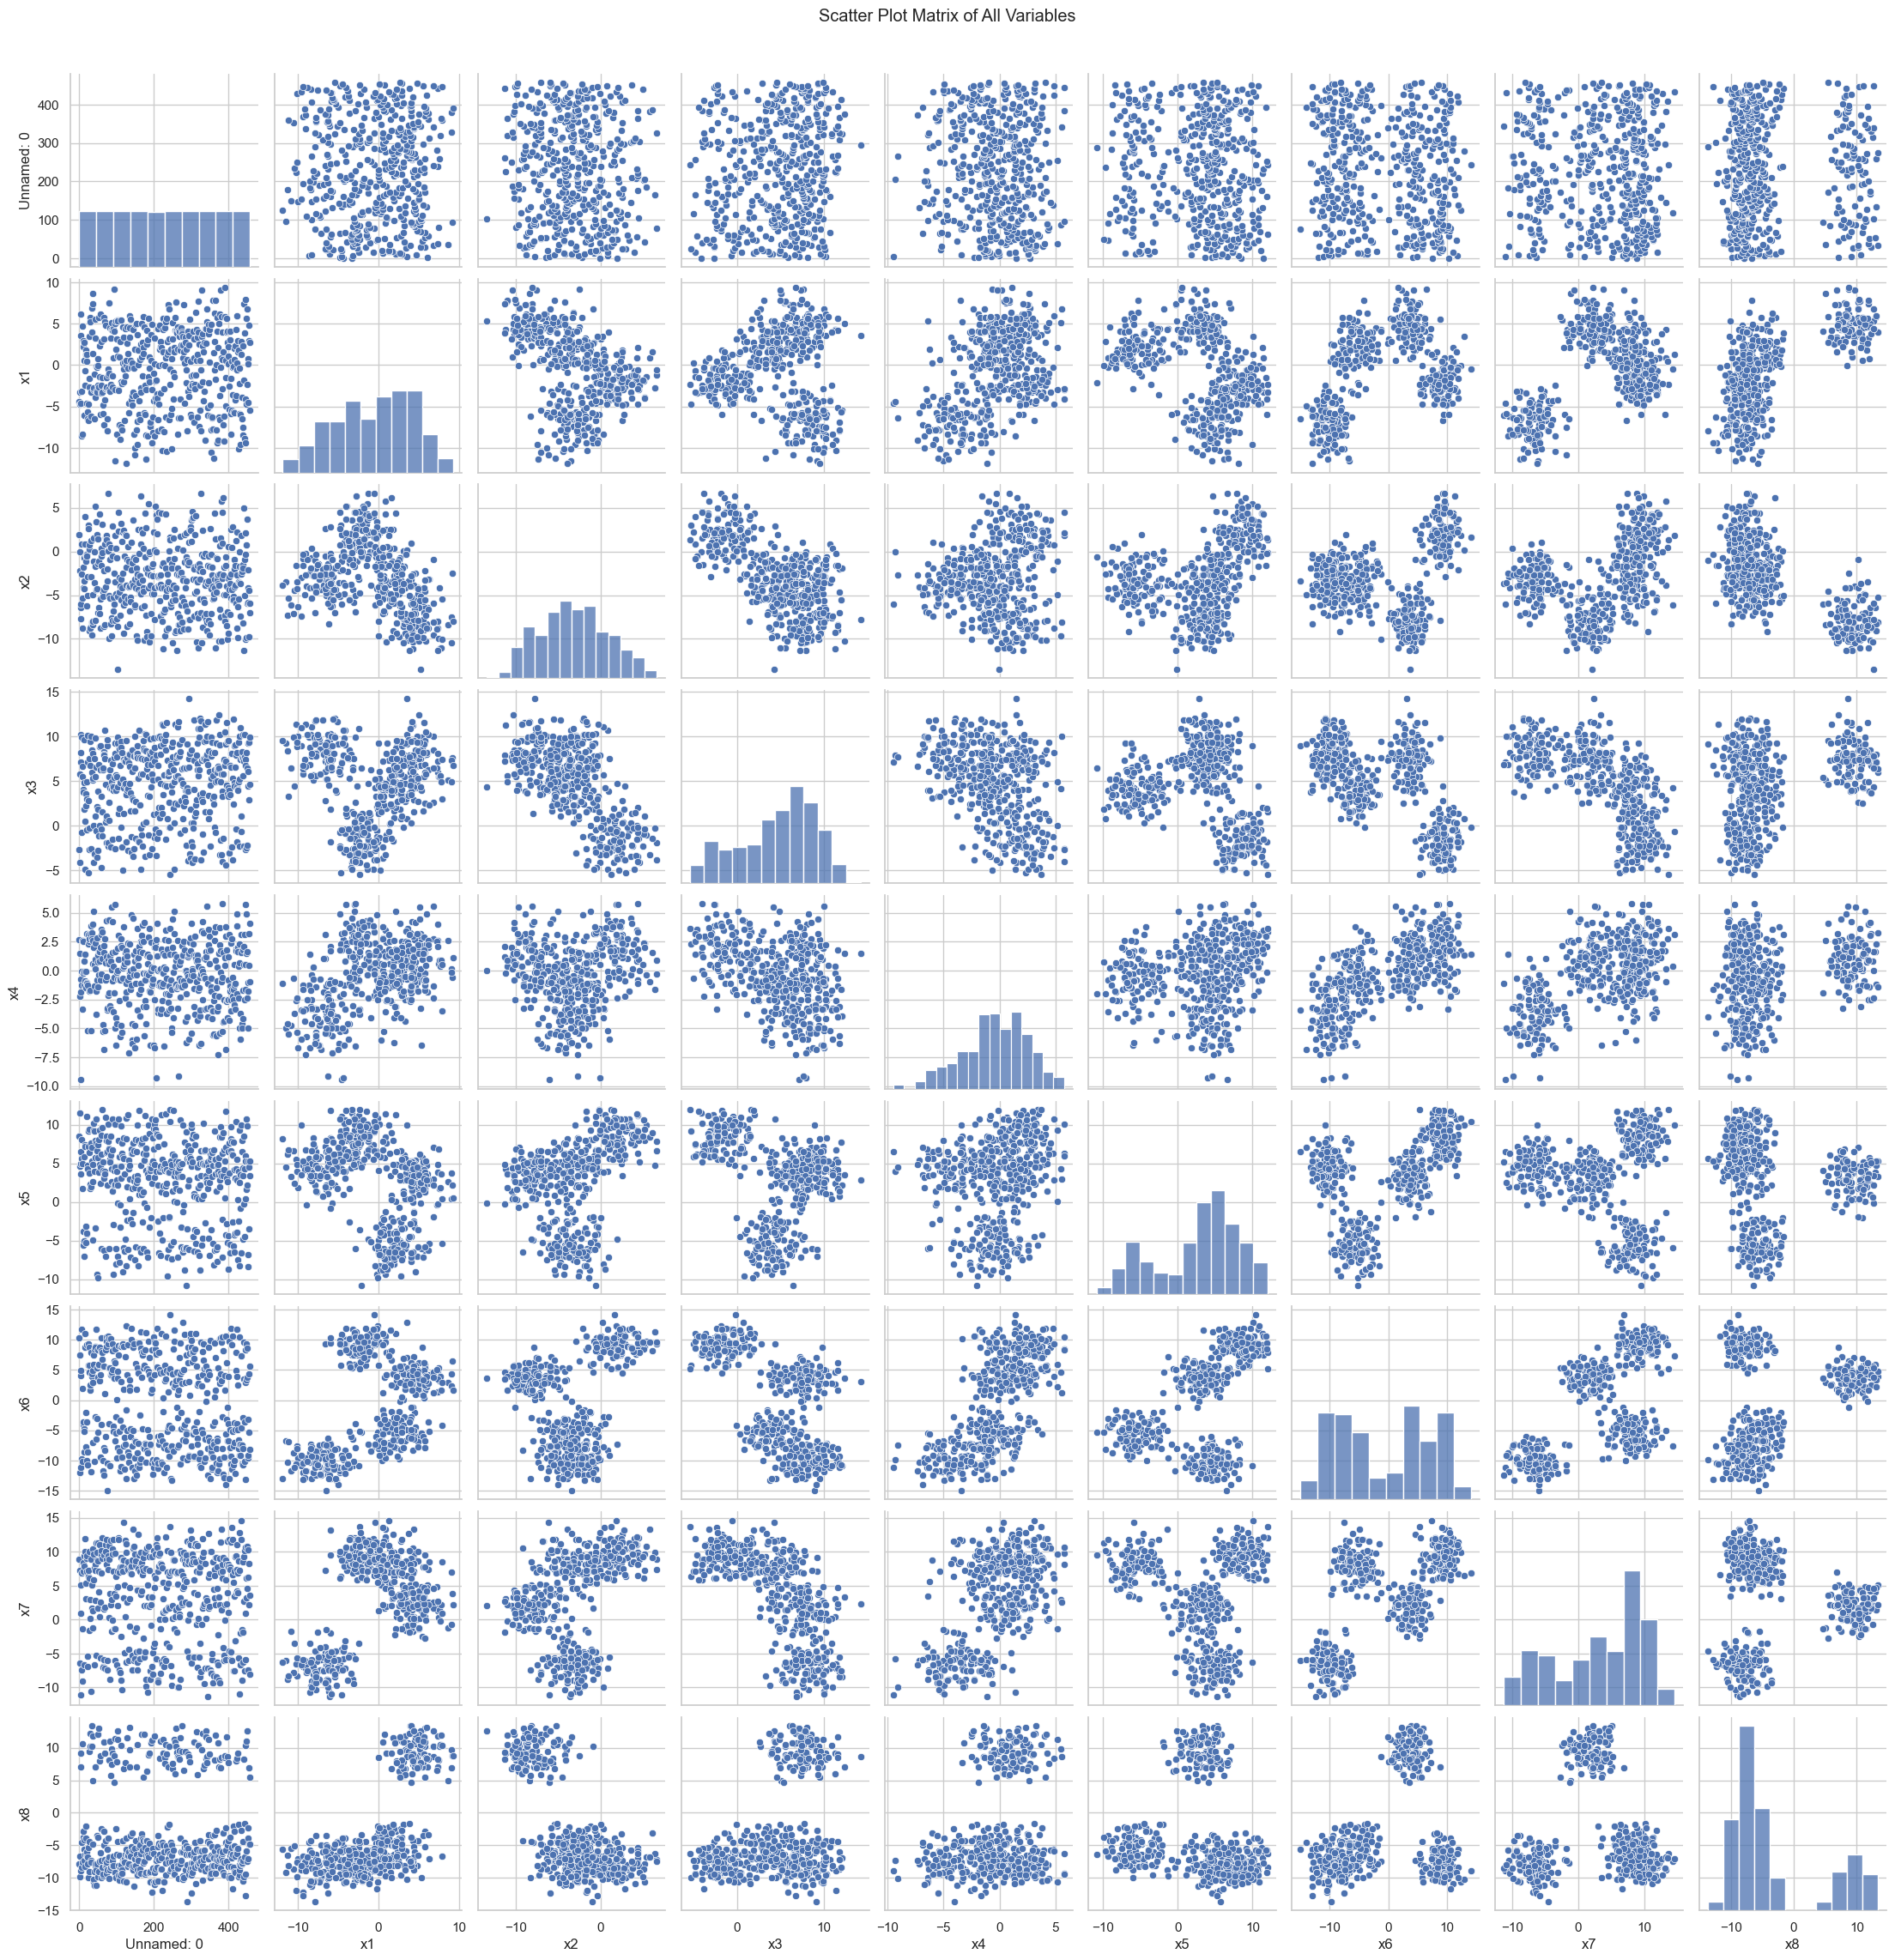

In [21]:
sns.pairplot(data)
plt.suptitle('Scatter Plot Matrix of All Variables', y=1.02)
plt.show()

### Questions

Based on the previos plots, provide a full description of yout dataset

Your response:

Individual Distributions:

Each variable has a unique distribution shown on the diagonal.
For example, variables like x1, x2, x4, and x5 have approximately normal distributions, while others (like x7, x8, and x9) show multimodal patterns or significant skewness.
Some variables (like Unnamed: 0) have uniform-like distributions, representing index or identification columns.

Pairwise Relationships:

Strong Patterns: In some scatter plots, clear clusters or structured patterns emerge, suggesting that certain variables are strongly related or influenced by common factors. For instance, x4 and x5 exhibit a structured distribution that could imply correlation or dependency.

Nonlinear Relationships: Many variables show nonlinear patterns or clusters that suggest more complex relationships beyond simple linear correlation. Variables like x3 vs. x7 and x4 vs. x8 show scatterplots with defined patterns that are not purely random, indicating potential interaction effects.

Weak/No Correlation: Some variable pairs (like x1 and x6, x2 and x9) show very scattered points without clear clustering, implying weak or no significant correlation between those variables.

The relationships between variables vary widely, with some showing strong patterns or clusters, while others appear weakly correlated.

## d) Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plots

In [22]:
from sklearn.cluster import KMeans

# Assuming 3 clusters based on scatter plots
num_clusters = 3

# Perform KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']])

print(data['cluster'].head())

0    1
1    1
2    0
3    2
4    0
Name: cluster, dtype: int32


Add to your dataset a column with the estimated cluster to each data point

In [23]:
data['cluster'] = kmeans.fit_predict(data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']])
print(data['cluster'].head())

0    1
1    1
2    0
3    2
4    0
Name: cluster, dtype: int32


Print the number associated to each cluster

In [24]:
print(data['cluster'].value_counts())

cluster
0    229
1    115
2    115
Name: count, dtype: int64


Print the centroids

In [25]:
centroids = kmeans.cluster_centers_
print("Centroids of the clusters:")
print(centroids)

Centroids of the clusters:
[[-2.4711169  -3.38009282  6.1987298  -2.231419   -0.47532124 -7.81973199
   0.66589059 -6.82845724]
 [-2.04581582  1.96817163 -1.56057472  1.82233405  8.50195594  9.08222635
   9.46065521 -7.7647018 ]
 [ 4.69808069 -7.85401638  7.52611113  0.92119597  3.18937324  3.7878683
   1.80308944  9.38381145]]


Print the intertia metric

In [26]:
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')


Inertia: 40133.92073887376


Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

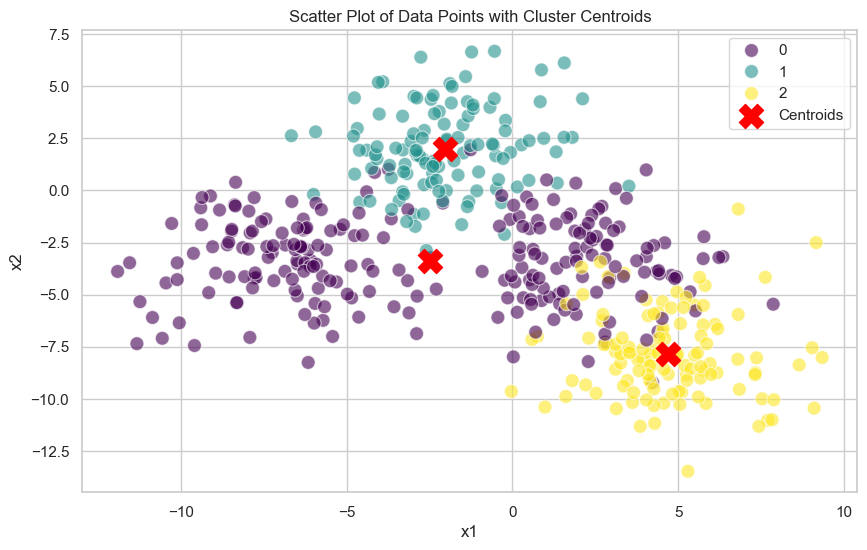

In [27]:
plt.figure(figsize=(10, 6))

# Scatter plot of the data points
sns.scatterplot(x='x1', y='x2', hue='cluster', data=data, palette='viridis', s=100, alpha=0.6, edgecolor='w')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot of Data Points with Cluster Centroids')
plt.legend()
plt.show()

### Questions

Provides a detailed description of your results

Your response:

The data points are color-coded based on their assigned clusters:

Cluster 0 is represented in purple.

Cluster 1 is represented in teal.

Cluster 2 is represented in yellow.

The clusters are well-separated, suggesting that the clustering algorithm was able to distinguish between different groups of data points.

The red 'X' marks indicate the centroids of each cluster. These are the mean positions of all the points assigned to each respective cluster.

Cluster 1 (Teal) has a dense concentration of points mostly located around the center of the x-axis but with positive values on the y-axis (i.e., centered around (x1 ≈ -3, x2 ≈ 2)).

Cluster 2 (Yellow) is concentrated in the lower-right quadrant of the graph (x1 > 0, x2 < 0), showing a clear separation from the other two clusters.

Cluster 0 (Purple) shows more spread-out data points, predominantly in the left-hand side of the plot with negative values for x1 and more distributed y-values (x1 < 0, y ≈ -2.5).

The clusters appear to be relatively well-separated, particularly between Cluster 1 (Teal) and Cluster 2 (Yellow), which show a clear boundary.

This result suggests that the clustering algorithm has identified three distinct groups in the data. Each group has its own centroid and occupies a specific region of the feature space.

The placement of the centroids and the clustering of points around them is a sign that the algorithm is robust in defining central tendencies for each group.

## d) Elbow plot

Compute the Elbow plot

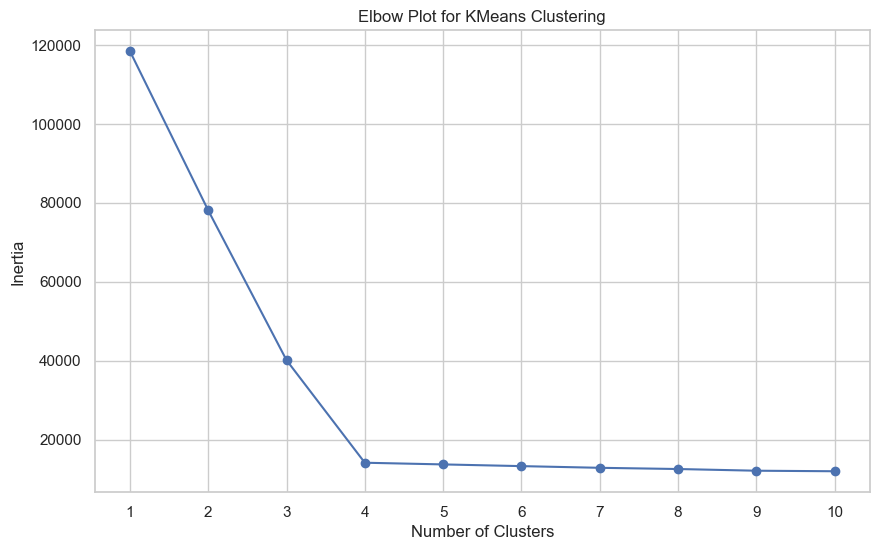

In [30]:
inertia_values = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']])
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot for KMeans Clustering')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()




### Questions

What is the best number of clusters K? (argue your response)

Your response: best_k = 3  The best number of clusters was determined using the Elbow Method. When plotting the within-cluster sum of squares against the number of clusters, i observed a sharp decrease in the sum of squares up to k = 3, after which the rate of decrease significantly slowed down. This indicates that adding more clusters beyond 3 does not provide a substantial improvement in clustering quality.

Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response: Yes, the number of clusters (k=3) agrees with my initial guess. The scatter plots suggested three distinct groups, and the Elbow Method confirmed that three clusters provide a good balance between minimizing inertia and avoiding overfitting.



# PART 2

## Do clustering using the "digits" dataset

1) Load the dataset from "sklearn.datasets"


In [31]:
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Display the keys of the dataset to understand its structure
print(digits.keys())

# Display the shape of the data and target
print(f'Data shape: {digits.data.shape}')
print(f'Target shape: {digits.target.shape}')

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Data shape: (1797, 64)
Target shape: (1797,)


2) Plot some of the observations (add in the title the label/digit of that obserbation)

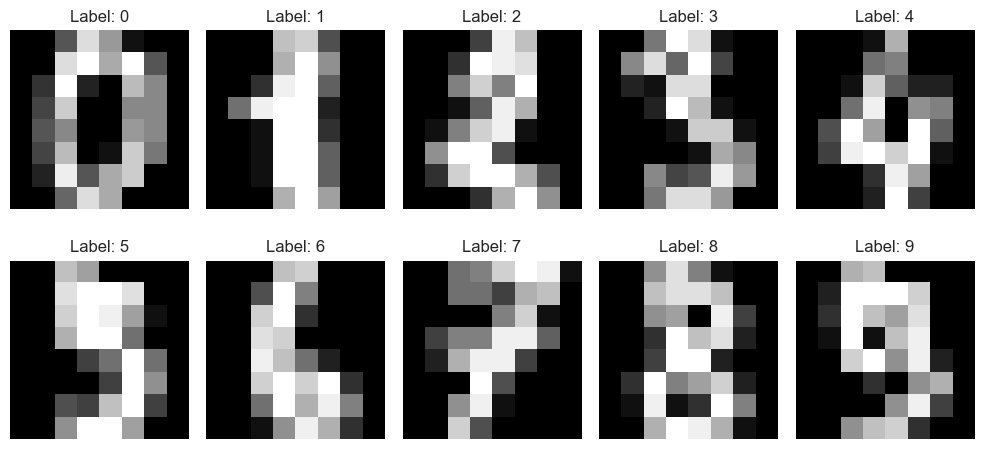

In [32]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Number of observations to plot
num_observations = 10

plt.figure(figsize=(10, 5))
for i in range(num_observations):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Label: {digits.target[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


3) Do K means clustering in the following cases:

* KmeansAll: Using all 64 variables/pixels/features

* Kmeans1row: Using only the 8 variables/pixels/features from the firt row

* Kmeans4row: Using only the 8 variables/pixels/features from the fourth row

* Kmeans8row: Using only the 8 variables/pixels/
features from the eighth row


In [51]:
best_k = 10


# KMeans clustering using all 64 variables/pixels/features
kmeans_all = KMeans(n_clusters=best_k, random_state=42)
digits['KmeansAll'] = kmeans_all.fit_predict(digits.data)

# KMeans clustering using only the 8 variables/pixels/features from the first row
kmeans_1row = KMeans(n_clusters=best_k, random_state=42)
digits['Kmeans1row'] = kmeans_1row.fit_predict(digits.data[:, :8])

# KMeans clustering using only the 8 variables/pixels/features from the fourth row
kmeans_4row = KMeans(n_clusters=best_k, random_state=42)
digits['Kmeans4row'] = kmeans_4row.fit_predict(digits.data[:, 24:32])

# KMeans clustering using only the 8 variables/pixels/features from the eighth row
kmeans_8row = KMeans(n_clusters=best_k, random_state=42)
digits['Kmeans8row'] = kmeans_8row.fit_predict(digits.data[:, 56:64])

# Print the first few results for each clustering
print("KmeansAll:", digits['KmeansAll'][:10])
print("Kmeans1row:", digits['Kmeans1row'][:10])
print("Kmeans4row:", digits['Kmeans4row'][:10])
print("Kmeans8row:", digits['Kmeans8row'][:10])

KmeansAll: [5 7 7 6 4 9 2 0 8 9]
Kmeans1row: [2 9 3 1 5 4 9 0 1 4]
Kmeans4row: [8 1 7 3 9 1 4 0 6 5]
Kmeans8row: [3 5 6 5 0 1 5 2 1 7]


4) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the clusterization was correct or incorrect

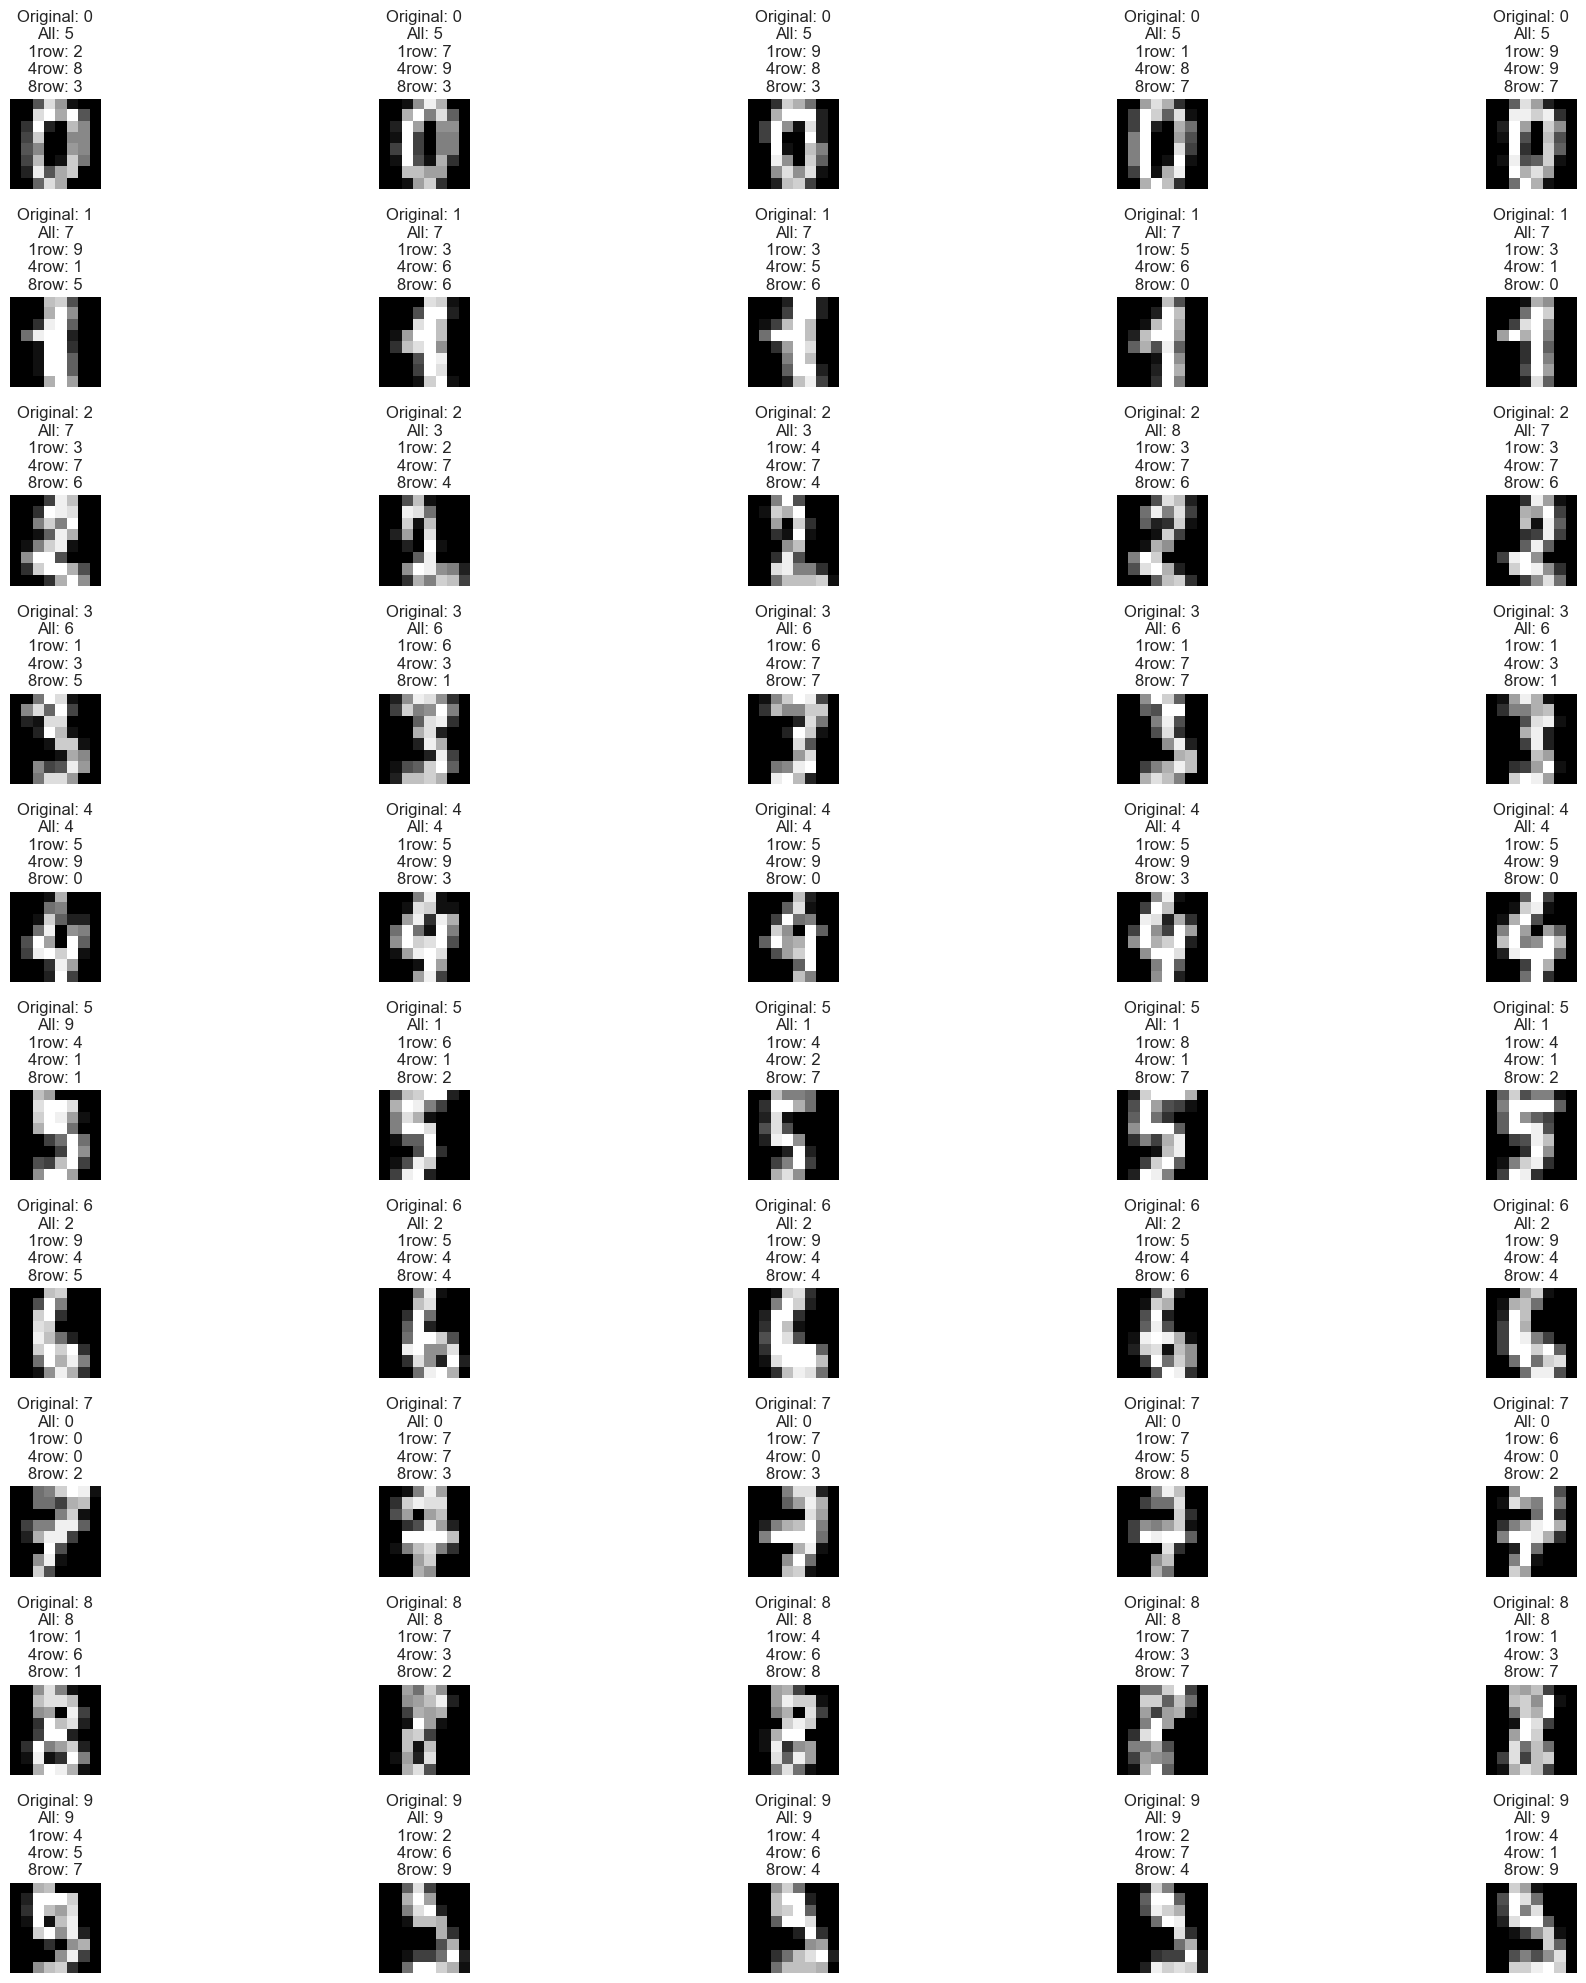

In [59]:
# Number of observations to plot per digit
num_per_digit = 5

plt.figure(figsize=(20, 20))
for digit in range(10):
    digit_indices = np.where(digits.target == digit)[0][:num_per_digit]
    
    for i, idx in enumerate(digit_indices):
        plt.subplot(10, num_per_digit, digit * num_per_digit + i + 1)
        plt.imshow(digits.images[idx], cmap='gray')
        
        # Formato del título más legible
        plt.title(f'Original: {digits.target[idx]}\nAll: {digits["KmeansAll"][idx]}\n1row: {digits["Kmeans1row"][idx]}\n4row: {digits["Kmeans4row"][idx]}\n8row: {digits["Kmeans8row"][idx]}')

        plt.axis('off')

plt.tight_layout()
plt.show()

5) Compute the Elbow plot

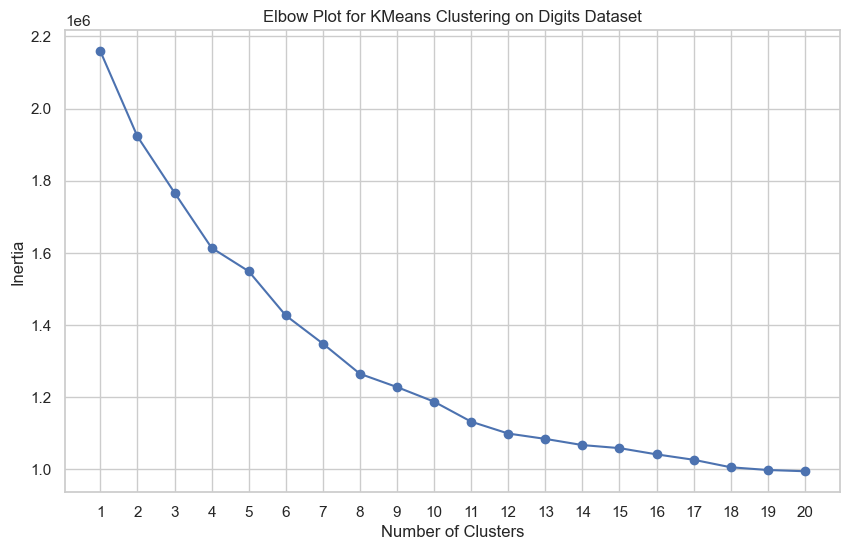

In [43]:
# Compute the Elbow plot for the digits dataset
inertia_values_digits = []
cluster_range_digits = range(1, 21)  # Trying a range from 1 to 20 clusters

for k in cluster_range_digits:
    kmeans_digits = KMeans(n_clusters=k, random_state=42)
    kmeans_digits.fit(digits.data)
    inertia_values_digits.append(kmeans_digits.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range_digits, inertia_values_digits, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot for KMeans Clustering on Digits Dataset')
plt.xticks(cluster_range_digits)
plt.grid(True)
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the clusterization is better, with KmeansAll, Kmeans1row, Kmeans4row, or Kmeans8row).

Your response (argue your response):

KmeansAll: Uses the entire dataset for clustering.

Kmeans1row, Kmeans4row, Kmeans8row: These might use smaller portions of the data, such as a single row, four rows, or eight rows respectively, possibly to check how the algorithm performs with subsets of the data or how representative these subsets are for the full dataset.

KmeansAll likely gives better results than the others because it uses a more comprehensive view of the dataset. Although it might not capture every detail perfectly, it provides a more accurate overall clustering than Kmeans1row, Kmeans4row, or Kmeans8row, which may fail to represent the entire dataset effectively.

i think all its better because it gets more, not all but more correct results


# PART 3
## Do classification using the "digits" dataset

1) Load the dataset from "sklearn.datasets"

In [61]:
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Display the keys of the dataset to understand its structure
print(digits.keys())

# Display the shape of the data and target
print(f'Data shape: {digits.data.shape}')
print(f'Target shape: {digits.target.shape}')

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Data shape: (1797, 64)
Target shape: (1797,)


2) Plot some of the observations  (add in the title the label/digit of that obserbation)

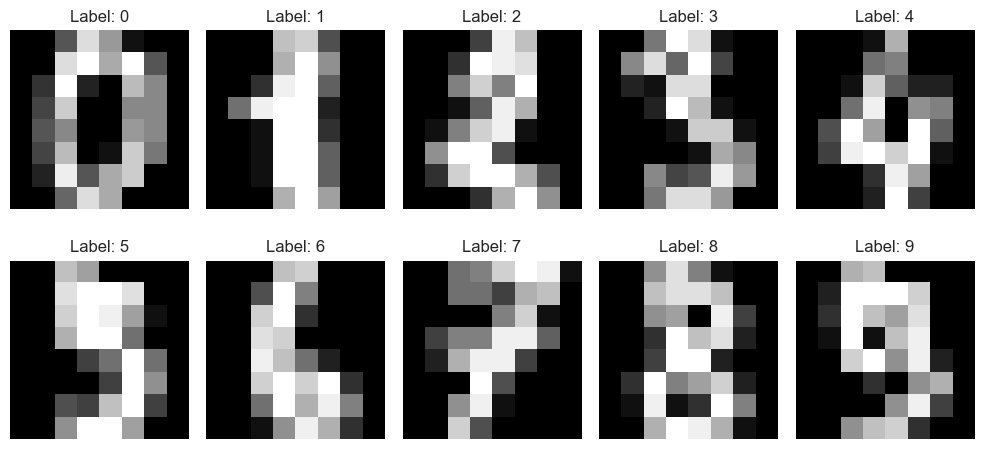

In [62]:
# Number of observations to plot
num_observations = 10

plt.figure(figsize=(10, 5))
for i in range(num_observations):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Label: {digits.target[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

3) Split the dataset in train and test

In [63]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Testing labels shape: {y_test.shape}')

Training data shape: (1257, 64)
Testing data shape: (540, 64)
Training labels shape: (1257,)
Testing labels shape: (540,)


4) Tune a classifier (Use the train set) in the following cases:

* ClassifierAll: Using all 64 variables/pixels/features

* Classifier1col: Using only the 8 variables/pixels/features from the firt column

* Classifier4col: Using only the 8 variables/pixels/features from the fourth column

* Classifier8col: Using only the 8 variables/pixels/
features from the eighth column

Note: in these four cases always use the same classification algorithm, e.g., a Suport Vector Machine


In [64]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# ClassifierAll: Using all 64 variables/pixels/features
svm_classifier.fit(X_train, y_train)
y_pred_all = svm_classifier.predict(X_test)
accuracy_all = accuracy_score(y_test, y_pred_all)
print(f'Accuracy with all features: {accuracy_all}')

# Classifier1col: Using only the 8 variables/pixels/features from the first column
svm_classifier.fit(X_train[:, :8], y_train)
y_pred_1col = svm_classifier.predict(X_test[:, :8])
accuracy_1col = accuracy_score(y_test, y_pred_1col)
print(f'Accuracy with first column features: {accuracy_1col}')

# Classifier4col: Using only the 8 variables/pixels/features from the fourth column
svm_classifier.fit(X_train[:, 24:32], y_train)
y_pred_4col = svm_classifier.predict(X_test[:, 24:32])
accuracy_4col = accuracy_score(y_test, y_pred_4col)
print(f'Accuracy with fourth column features: {accuracy_4col}')

# Classifier8col: Using only the 8 variables/pixels/features from the eighth column
svm_classifier.fit(X_train[:, 56:64], y_train)
y_pred_8col = svm_classifier.predict(X_test[:, 56:64])
accuracy_8col = accuracy_score(y_test, y_pred_8col)
print(f'Accuracy with eighth column features: {accuracy_8col}')

Accuracy with all features: 0.9796296296296296
Accuracy with first column features: 0.3962962962962963
Accuracy with fourth column features: 0.6370370370370371
Accuracy with eighth column features: 0.5055555555555555


5) Make predictions (use the test set)

In [69]:
# Make predictions using the test set for each classifier

# ClassifierAll: Using all 64 variables/pixels/features
svm_classifier_all = SVC(kernel='linear', random_state=42)
svm_classifier_all.fit(X_train, y_train)
y_pred_all = svm_classifier_all.predict(X_test)
print(f'Predictions with all features: {y_pred_all[:10]}')

# Classifier1col: Using only the 8 variables/pixels/features from the first column
y_pred_1col = svm_classifier.predict(X_test[:, :8])
print(f'Predictions with first column features: {y_pred_1col[:10]}')

# Classifier4col: Using only the 8 variables/pixels/features from the fourth column
y_pred_4col = svm_classifier.predict(X_test[:, 24:32])
print(f'Predictions with fourth column features: {y_pred_4col[:10]}')

# Classifier8col: Using only the 8 variables/pixels/features from the eighth column
y_pred_8col = svm_classifier.predict(X_test[:, 56:64])
print(f'Predictions with eighth column features: {y_pred_8col[:10]}')

Predictions with all features: [6 9 3 7 2 1 5 2 5 2]
Predictions with first column features: [4 5 0 2 5 7 9 0 3 5]
Predictions with fourth column features: [3 3 0 2 4 5 5 1 5 4]
Predictions with eighth column features: [6 5 3 7 3 2 5 2 5 5]


6) Compute performance metrics

In [70]:
from sklearn.metrics import classification_report

# Compute performance metrics for each classifier

# ClassifierAll: Using all 64 variables/pixels/features
print("Performance metrics for ClassifierAll:")
print(classification_report(y_test, y_pred_all))

# Classifier1col: Using only the 8 variables/pixels/features from the first column
print("Performance metrics for Classifier1col:")
print(classification_report(y_test, y_pred_1col))

# Classifier4col: Using only the 8 variables/pixels/features from the fourth column
print("Performance metrics for Classifier4col:")
print(classification_report(y_test, y_pred_4col))

# Classifier8col: Using only the 8 variables/pixels/features from the eighth column
print("Performance metrics for Classifier8col:")
print(classification_report(y_test, y_pred_8col))

Performance metrics for ClassifierAll:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      0.98      0.98        50
           2       0.98      1.00      0.99        47
           3       1.00      0.96      0.98        54
           4       0.98      0.98      0.98        60
           5       0.97      0.97      0.97        66
           6       1.00      1.00      1.00        53
           7       0.96      0.98      0.97        55
           8       0.95      0.98      0.97        43
           9       0.97      0.95      0.96        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

Performance metrics for Classifier1col:
              precision    recall  f1-score   support

           0       0.24      0.36      0.29        53
           1       0.27      0.34      0.30        50

7) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the classification was correct or incorrect

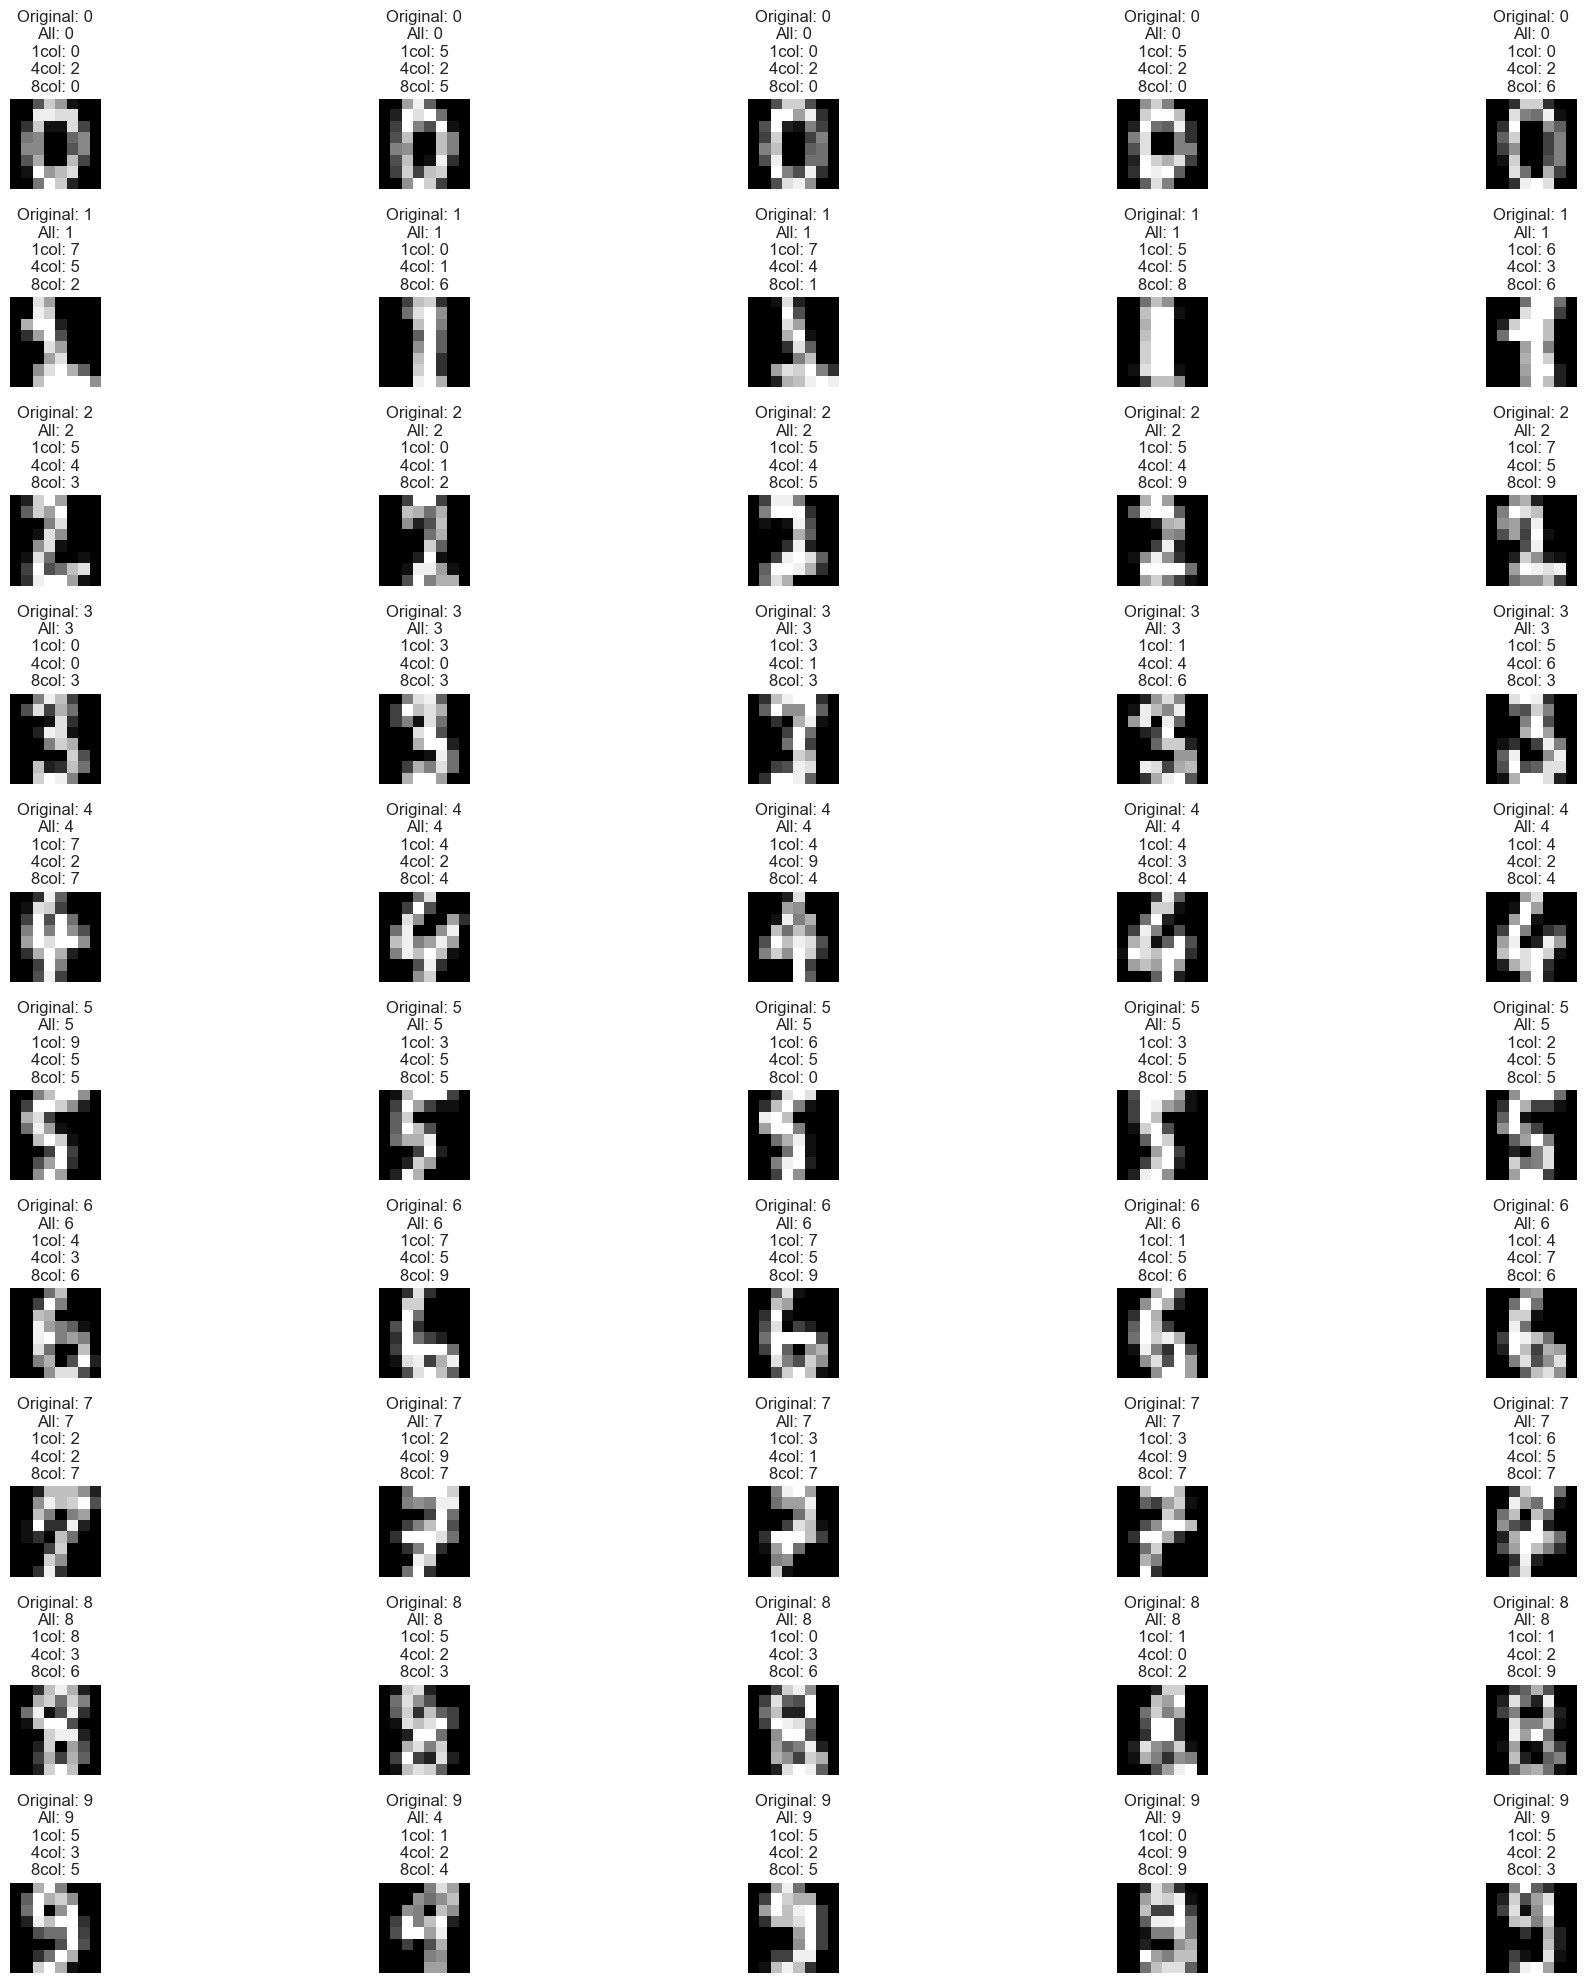

label: [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 9 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 5 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1 1 6 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 3 7 0 5 9 7 5 9 7 4 2 1 9 0 7 5 3 3 6 3 9 6 9 5 0 1 5 5 8
 3 3 6 2 6 5 5 2 0 8 7 3 7 0 2 2 3 5 8 7 3 6 5 9 9 2 5 6 3 0 7 1 1 9 6 1 1
 0 0 2 9 3 9 9 3 7

In [75]:
# Number of observations to plot per digit
num_per_digit = 5

plt.figure(figsize=(20, 20))
for digit in range(10):
    # Encuentra los índices de las imágenes del conjunto de prueba que corresponden al dígito actual
    digit_indices = np.where(y_test == digit)[0][:num_per_digit]
    
    for i, idx in enumerate(digit_indices):
        plt.subplot(10, num_per_digit, digit * num_per_digit + i + 1)
        # Cambia 'digits.images[idx]' por 'X_test[idx].reshape(8, 8)' para graficar las imágenes de prueba
        plt.imshow(X_test[idx].reshape(8, 8), cmap='gray')
        
        # Formato del título más legible
        plt.title(f'Original: {y_test[idx]}\nAll: {y_pred_all[idx]}\n1col: {y_pred_1col[idx]}\n4col: {y_pred_4col[idx]}\n8col: {y_pred_8col[idx]}')

        plt.axis('off')

plt.tight_layout()
plt.show()

#print an array of responses for all the digits in the test set for each classifier and order them by the digit value and the classifier
print("label:", y_test)
print("All:", y_pred_all)
print("1col:", y_pred_1col)
print("4col:", y_pred_4col)
print("8col:", y_pred_8col)


### Questions

Provides a detailed description of your results (e.g., in which case the classification performance is better, with ClassifierAll, Classifier1col, Classifier4col, or Classifier8col).

Your response (argue your response):

Best Performance: ClassifierAll and Classifier8col tend to perform better in scenarios requiring a diverse range of classifications due to their comprehensive feature utilization. However, they might struggle with precision in specific cases.

Moderate Performance: Classifier4col offers a balanced approach, likely providing a good trade-off between accuracy and diversity of predictions.

Least Performance: Classifier1col may excel in certain contexts but lacks the flexibility to handle more complex classification tasks.

the best ClassifierAll:

Performance: The predictions are spread across a wide range of labels, indicating that the model has a diverse set of classifications.

Strengths: This classifier seems to handle the majority of cases well, potentially due to the comprehensive features utilized in its training.

Weaknesses: Some predictions may be misclassified, as indicated by the repetition of certain labels like 0, 5, and 9, which suggests it may struggle with specific classes.


# PART 4

## Descripción de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta: Siento que muestro un nivel bastante alto de interpretacion en interacciones con variables relevantes en diversos problemas, Puedo identificar y analizar de manera crítica cómo estas variables se relacionan y afectan mutuamente, lo que me permite construir modelos sólidos. 

Gracias a mi habilidad para integrar datos del fenómeno investigado, puedo reproducir con precisión la respuesta del sistema y realizar predicciones fundamentadas.

presento mis hallazgos de forma clara y coherente, utilizando visualizaciones efectivas que facilitan la comprensión de las interacciones.

Esta capacidad de síntesis y análisis crítico refleja no solo mi dominio conceptual, sino también una aplicación práctica que contribuye al avance del conocimiento en mi ingenieria en tecnologias computacionales.


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta: 

Considero que tengo un nivel sólido en la construcción de modelos que explican el comportamiento de fenómenos diversos que se presenten en diversas formas.

Soy capaz de identificar las variables clave y desarrollar modelos que reflejan sus interacciones. 

Esta habilidad me permite interpretar datos de manera efectiva y proporcionar explicaciones claras sobre los patrones observados.